In [125]:
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#import optuna
#from optuna.integration import SklearnSearchCV


In [136]:
# Carga la base de datos desde un archivo csv
df_0 = pd.read_csv('diabetic_data_modified.csv')
df = df_0.copy()
df.head()

,Unnamed: 0,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,0,0,0,0,0,0,0,No,No,NO
1,1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,0,0,0,0,0,0,2,Ch,Yes,>30
2,2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,0,0,1,0,0,0,0,No,Yes,NO
3,3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,0,0,0,0,0,0,2,Ch,Yes,NO
4,4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,0,0,1,0,0,0,1,Ch,Yes,NO


In [137]:
df = df.drop(columns=["Unnamed: 0","patient_nbr",], axis=1)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,0,0,0,0,0,0,2,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,0,0,1,0,0,0,0,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,0,0,0,0,0,0,2,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,0,0,1,0,0,0,1,Ch,Yes,NO


In [138]:
df.select_dtypes(include=['category', 'object'])


,race,gender,age,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),Diabetes mellitus,Other,Other,Not taken,Not taken,No,No,NO
1,Caucasian,Female,[10-20),Other,Diabetes mellitus,Other,Not taken,Not taken,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),Other,Diabetes mellitus,Other,Not taken,Not taken,No,Yes,NO
3,Caucasian,Male,[30-40),Other,Diabetes mellitus,Diseases of the circulatory system,Not taken,Not taken,Ch,Yes,NO
4,Caucasian,Male,[40-50),Neoplasms,Neoplasms,Diabetes mellitus,Not taken,Not taken,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...
71513,Caucasian,Female,[70-80),Diseases of the digestive system,Diseases of the digestive system,Diabetes mellitus,Not taken,>7,Ch,Yes,>30
71514,Other,Female,[40-50),Diseases of the genitourinary system,Diseases of the genitourinary system,Diseases of the respiratory system,Not taken,>8,Ch,Yes,>30
71515,Other,Female,[60-70),Injury and poisoning,Diseases of the genitourinary system,Diseases of the circulatory system,Not taken,Not taken,No,Yes,>30
71516,Caucasian,Female,[80-90),Other,Other,Other,Not taken,Not taken,Ch,Yes,NO


In [139]:
df.select_dtypes(include=['int', 'float'])

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin
0,6,25,1,1,41,0,1,0,0,0,1,0,0,0,0,0,0,0
1,1,1,7,3,59,0,18,0,0,0,9,0,0,0,0,0,0,2
2,1,1,7,2,11,5,13,2,0,1,6,0,0,1,0,0,0,0
3,1,1,7,2,44,1,16,0,0,0,7,0,0,0,0,0,0,2
4,1,1,7,1,51,0,8,0,0,0,5,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,1,1,7,9,50,2,33,0,0,0,9,0,0,0,2,0,0,1
71514,1,1,7,14,73,6,26,0,1,0,9,0,0,1,0,0,0,2
71515,1,1,7,2,46,6,17,1,1,1,9,0,0,0,0,0,0,1
71516,1,1,7,5,76,1,22,0,1,0,9,0,0,0,0,0,0,2


In [140]:
# Muestra los valores unicos de la columna que sera el target
valores_unicos = df['readmitted'].unique()
valores_unicos

array(['NO', '>30', '<30'], dtype=object)

In [141]:
# Reemplazar 'NO' por 0 y cualquier otro valor por 1
df['readmitted'] = df['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})

C:\Users\Guille\AppData\Local\Temp\ipykernel_22728\1913057400.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})


In [142]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,No,No,0
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,0,0,0,0,0,0,2,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,0,0,1,0,0,0,0,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,0,0,0,0,0,0,2,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,0,0,1,0,0,0,1,Ch,Yes,0


readmitted
0    42985
1    28533
Name: count, dtype: int64


<Axes: xlabel='readmitted', ylabel='count'>

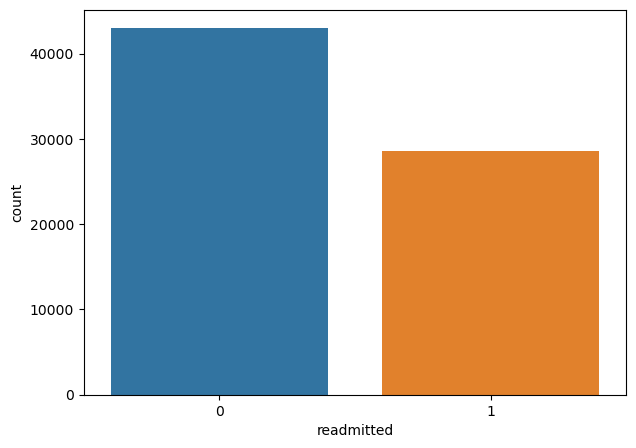

In [143]:
print(df.readmitted.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='readmitted', data=df)

In [144]:
df.shape

(71518, 29)

In [145]:
# Selecciona automáticamente las columnas categóricas del DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns

# Realiza codificación one-hot manualmente para cada columna categórica
encoded_columns = pd.get_dummies(df[categorical_columns])

# Convierte las columnas codificadas one-hot en valores numéricos
encoded_columns = encoded_columns.astype(int)

# Concatena las columnas codificadas one-hot con el DataFrame original
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_columns], axis=1)

df_encoded

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,max_glu_serum_Norm,max_glu_serum_Not taken,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,A1Cresult_Not taken,change_Ch,change_No,diabetesMed_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
1,1,1,7,3,59,0,18,0,0,0,...,0,1,0,0,0,1,1,0,0,1
2,1,1,7,2,11,5,13,2,0,1,...,0,1,0,0,0,1,0,1,0,1
3,1,1,7,2,44,1,16,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,1,1,7,1,51,0,8,0,0,0,...,0,1,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71513,1,1,7,9,50,2,33,0,0,0,...,0,1,1,0,0,0,1,0,0,1
71514,1,1,7,14,73,6,26,0,1,0,...,0,1,0,1,0,0,1,0,0,1
71515,1,1,7,2,46,6,17,1,1,1,...,0,1,0,0,0,1,0,1,0,1
71516,1,1,7,5,76,1,22,0,1,0,...,0,1,0,0,0,1,1,0,0,1


In [146]:
df_encoded.shape

(71518, 76)

In [147]:
df_encoded.columns

Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'glimepiride',
       'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin',
       'readmitted', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'gender_Female', 'gender_Male',
       'gender_Unknown/Invalid', 'age_[0-10)', 'age_[10-20)', 'age_[20-30)',
       'age_[30-40)', 'age_[40-50)', 'age_[50-60)', 'age_[60-70)',
       'age_[70-80)', 'age_[80-90)', 'age_[90-100)',
       'diag_1_Diabetes mellitus', 'diag_1_Diseases of the circulatory system',
       'diag_1_Diseases of the digestive system',
       'diag_1_Diseases of the genitourinary system',
       'diag_1_Diseases of the musculoskeletal system and connective tissue',
       'diag_1_Diseases of th

In [148]:
# Define las features y la variable target
X = df_encoded.drop('readmitted', axis=1)  # Features
y = df_encoded['readmitted']  # Target variable

In [149]:
# Separa los datos de entrenamiento y evaulacion
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [157]:
X_train.shape

(57214, 75)

Creacion del modelo

In [158]:
def build_model(n_neurons=5,input_shape=(X_train.shape[1],)):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))
  model.add(keras.layers.Dense(n_neurons, activation='relu' ))
  model.add(keras.layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [159]:
# Crea un clasificador de Keras que es compatible con scikit-learn
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, validation_split=0.2)

C:\Users\Guille\AppData\Local\Temp\ipykernel_22728\1618677641.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=100, validation_split=0.2)


In [160]:
# Crea un pipeline en scikit-learn. Un pipeline es una secuencia de transformaciones y un estimador final. 
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [161]:
# Inicia el entrenamiento del modelo de keras
model.fit(X_train,y_train)

Epoch 1/100
1431/1431 [==============================] - 2s 1ms/step - loss: 0.6770 - accuracy: 0.5933 - val_loss: 0.6699 - val_accuracy: 0.6019
Epoch 2/100
1431/1431 [==============================] - 1s 908us/step - loss: 0.6683 - accuracy: 0.5979 - val_loss: 0.6656 - val_accuracy: 0.6019
Epoch 3/100
1431/1431 [==============================] - 1s 934us/step - loss: 0.6648 - accuracy: 0.5980 - val_loss: 0.6623 - val_accuracy: 0.6020
Epoch 4/100
1431/1431 [==============================] - 1s 885us/step - loss: 0.6619 - accuracy: 0.6014 - val_loss: 0.6595 - val_accuracy: 0.6089
Epoch 5/100
1431/1431 [==============================] - 1s 883us/step - loss: 0.6592 - accuracy: 0.6070 - val_loss: 0.6569 - val_accuracy: 0.6108
Epoch 6/100
1431/1431 [==============================] - 1s 903us/step - loss: 0.6568 - accuracy: 0.6109 - val_loss: 0.6551 - val_accuracy: 0.6129
Epoch 7/100
1431/1431 [==============================] - 1s 890us/step - loss: 0.6545 - accuracy: 0.6137 - val_loss: 0.6

Pipeline(steps=[('scale', StandardScaler()),
                ('ann',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001DB4BA94610>)])

In [162]:
# Predice según los datos de testeo e imprime los resultados con cuatro decimales
y_fit = model.predict(X_test)
print(classification_report(y_test, y_fit, digits=4))

447/447 [==============================] - 0s 545us/step
              precision    recall  f1-score   support

           0     0.6516    0.8603    0.7416      8732
           1     0.5605    0.2793    0.3728      5572

    accuracy                         0.6339     14304
   macro avg     0.6061    0.5698    0.5572     14304
weighted avg     0.6161    0.6339    0.5979     14304



In [164]:
# Limpia el modelo anteior para liberar espacio en memoria
keras.backend.clear_session()

### Se procedera a buscar los mejores hiperparametros para el modelo

In [165]:
def build_model(n_hidden=1, n_neurons=5, input_shape=(X_train.shape[1],), num_classes=2):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(n_neurons, activation='relu', input_shape=input_shape))

    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))

    # Capa de salida adaptada para el número de clases
    if num_classes == 2:
        model.add(keras.layers.Dense(1, activation='sigmoid'))  # Clasificación binaria
        loss = 'binary_crossentropy'
    else:
        model.add(keras.layers.Dense(num_classes, activation='softmax'))  # Clasificación multiclase
        loss = 'categorical_crossentropy'

    model.compile(optimizer='sgd', loss=loss, metrics=['accuracy'])
    return model

In [166]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=0)

C:\Users\Guille\AppData\Local\Temp\ipykernel_22728\854310640.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=50, verbose=0)


In [167]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [168]:
# Diccionario con los hiperparametros a testear
params = {
    'ann__n_hidden':[0,1,2,3,4,5],
    'ann__n_neurons':np.arange(0,30),
    'ann__batch_size':[10,15,20,25,30]
}

In [169]:
rnd_search = RandomizedSearchCV(model, params, n_iter=10, cv=3, n_jobs=-1, verbose=2)

In [170]:
grid_result = rnd_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [171]:
grid_result.best_params_

{'ann__n_neurons': 25, 'ann__n_hidden': 0, 'ann__batch_size': 30}

In [172]:
sk_params = {
    'batch_size':grid_result.best_params_['ann__batch_size'],
    'n_hidden': grid_result.best_params_['ann__n_hidden'],
    'n_neurons':grid_result.best_params_['ann__n_neurons']
}

In [173]:
sk_params

{'batch_size': 30, 'n_hidden': 0, 'n_neurons': 25}

In [174]:
keras.backend.clear_session()

In [175]:
keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=20, verbose=1, **sk_params )

C:\Users\Guille\AppData\Local\Temp\ipykernel_22728\2354317905.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_cs = keras.wrappers.scikit_learn.KerasClassifier(build_fn=build_model, epochs=20, verbose=1, **sk_params )


In [176]:
model =  Pipeline([
                   ('scale', StandardScaler()), ('ann', keras_cs)
])

In [177]:
model.fit(X_train,y_train)

Epoch 1/20


1908/1908 [==============================] - 2s 699us/step - loss: 0.6716 - accuracy: 0.6009
Epoch 2/20
1908/1908 [==============================] - 1s 727us/step - loss: 0.6519 - accuracy: 0.6220
Epoch 3/20
1908/1908 [==============================] - 1s 735us/step - loss: 0.6488 - accuracy: 0.6238
Epoch 4/20
1908/1908 [==============================] - 1s 725us/step - loss: 0.6471 - accuracy: 0.6263
Epoch 5/20
1908/1908 [==============================] - 1s 756us/step - loss: 0.6457 - accuracy: 0.6276
Epoch 6/20
1908/1908 [==============================] - 1s 721us/step - loss: 0.6446 - accuracy: 0.6282
Epoch 7/20
1908/1908 [==============================] - 1s 711us/step - loss: 0.6436 - accuracy: 0.6293
Epoch 8/20
1908/1908 [==============================] - 1s 722us/step - loss: 0.6429 - accuracy: 0.6296
Epoch 9/20
1908/1908 [==============================] - 1s 708us/step - loss: 0.6422 - accuracy: 0.6306
Epoch 10/20
1908/1908 [==============================] - 1s 727us/step - lo

Pipeline(steps=[('scale', StandardScaler()),
                ('ann',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001DB37CE5190>)])

447/447 [==============================] - 0s 540us/step
              precision    recall  f1-score   support

           0     0.6517    0.8559    0.7400      8732
           1     0.5563    0.2830    0.3752      5572

    accuracy                         0.6328     14304
   macro avg     0.6040    0.5695    0.5576     14304
weighted avg     0.6145    0.6328    0.5979     14304



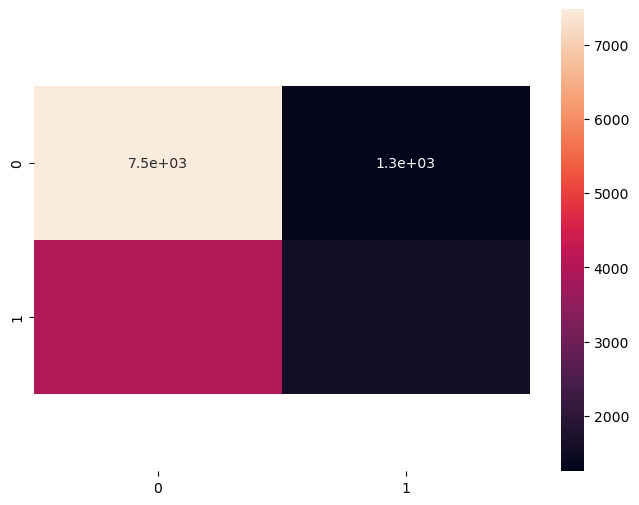

In [178]:
y_fit = model.predict(X_test)

plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_fit)
sns.heatmap(conf_matrix, annot=True)  # Utiliza fmt=".4f" para imprimir números con 4 decimales
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

# Imprimir el informe de clasificación con números con 4 decimales
print(classification_report(y_test, y_fit, digits=4))


***

In [12]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
df = pd.read_csv('diabetic_data_modified.csv')
df = df.drop(columns=["Unnamed: 0","patient_nbr",], axis=1)
df['readmitted'] = df['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})
categorical_columns = df.select_dtypes(include=['object']).columns
encoded_columns = pd.get_dummies(df[categorical_columns])
encoded_columns = encoded_columns.astype(int)
df_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_columns], axis=1)
X = df_encoded.drop('readmitted', axis=1)  # Features
y = df_encoded['readmitted']  # Target variable

C:\Users\Guille\AppData\Local\Temp\ipykernel_3624\3020703118.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})


In [14]:
# Preprocesar tus datos
X = df_encoded.drop('readmitted', axis=1).values.astype(np.float32)  # Obtener características como matriz numpy
y = df_encoded['readmitted'].values.astype(np.float32)       # Obtener etiquetas como matriz numpy

In [15]:
# Dividir datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).cuda()
y_train_tensor = torch.tensor(y_train, dtype=torch.long).cuda()

# Convertir y_test a un array de NumPy y luego a tensor de PyTorch
y_test_np = y_test.astype(int)  # Convertir a tipo int si no lo está
y_test_tensor = torch.tensor(y_test_np, dtype=torch.long).cuda()

In [18]:
# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).cuda()
y_train_tensor = torch.tensor(y_train, dtype=torch.long).cuda()
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).cuda()
y_test_tensor = torch.tensor(y_test, dtype=torch.long).cuda()

In [19]:
class Classifier(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [20]:
# Configuración del modelo
input_dim = X_train.shape[1]
output_dim = len(df['readmitted'].unique())
model = Classifier(input_dim, output_dim).cuda()

# Definir función de pérdida y optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Epoch [1/10000], Loss: 0.6963462829589844
Epoch [2/10000], Loss: 0.6907228231430054
Epoch [3/10000], Loss: 0.6856984496116638
Epoch [4/10000], Loss: 0.6812710762023926
Epoch [5/10000], Loss: 0.6774320602416992
Epoch [6/10000], Loss: 0.6741604208946228
Epoch [7/10000], Loss: 0.671421229839325
Epoch [8/10000], Loss: 0.6691665053367615
Epoch [9/10000], Loss: 0.6673378944396973
Epoch [10/10000], Loss: 0.6658646464347839
Epoch [11/10000], Loss: 0.6646707653999329
Epoch [12/10000], Loss: 0.6636832356452942
Epoch [13/10000], Loss: 0.6628350615501404
Epoch [14/10000], Loss: 0.6620675921440125
Epoch [15/10000], Loss: 0.6613359451293945
Epoch [16/10000], Loss: 0.6606107950210571
Epoch [17/10000], Loss: 0.6598747968673706
Epoch [18/10000], Loss: 0.6591213941574097
Epoch [19/10000], Loss: 0.6583519577980042
Epoch [20/10000], Loss: 0.6575747132301331
Epoch [21/10000], Loss: 0.6567985415458679
Epoch [22/10000], Loss: 0.6560366153717041
Epoch [23/10000], Loss: 0.6552981734275818
Epoch [24/10000], Los

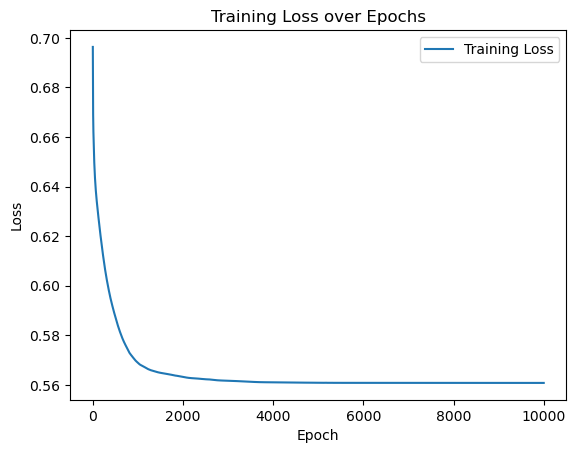

In [21]:
# Entrenamiento del modelo
epochs = 10000
train_losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    train_losses.append(loss.item())
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

# Graficar las métricas durante el entrenamiento
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.73      0.69      8732
           1       0.49      0.40      0.44      5572

    accuracy                           0.60     14304
   macro avg       0.57      0.56      0.56     14304
weighted avg       0.59      0.60      0.59     14304



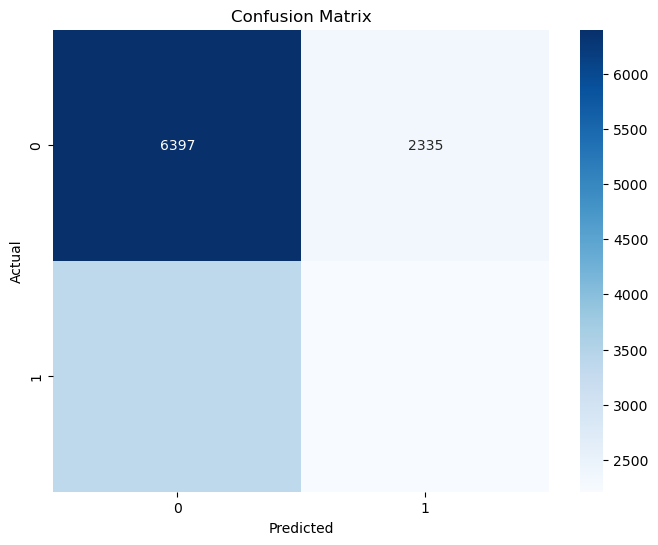

In [23]:
# Evaluación en datos de prueba
with torch.no_grad():
    model.eval()
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

# Mostrar métricas
print(classification_report(y_test_tensor.cpu().numpy(), predicted.cpu().numpy()))

# Graficar matriz de confusión
cm = confusion_matrix(y_test_tensor.cpu().numpy(), predicted.cpu().numpy())
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=df['readmitted'].unique(), yticklabels=df['readmitted'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***

Codigo de googlecolab

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [107]:
df = pd.read_csv('diabetic_data_modified.csv')
df.head()

,Unnamed: 0,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,0,0,0,0,0,0,0,No,No,NO
1,1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,0,0,0,0,0,0,2,Ch,Yes,>30
2,2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,0,0,1,0,0,0,0,No,Yes,NO
3,3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,0,0,0,0,0,0,2,Ch,Yes,NO
4,4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,0,0,1,0,0,0,1,Ch,Yes,NO


In [108]:
# Convertir la columna 'readmitted' en binaria (NO = 0; >30 y <30 = 1)
df2 = df.copy()
df2['readmitted'] = df2['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})
df2 = df2.drop(columns=["Unnamed: 0","patient_nbr",], axis=1)

# Definir las características (features) y la variable objetivo
X = df2.drop('readmitted', axis=1)  # Features
y = df2['readmitted']  # Target variable

# Definir las columnas numéricas y categóricas
numerical_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]
categorical_cols = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
    'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed'
]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Guille\AppData\Local\Temp\ipykernel_22728\3865154589.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['readmitted'] = df2['readmitted'].replace({'NO': 0, '>30': 1, '<30': 1})


In [109]:
# Crear un pipeline para cada modelo
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_lr = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline_dt = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Lista de pipelines de modelos
pipelines = [
    ('RandomForest', pipeline_rf),
    ('XGBoost', pipeline_xgb),
    ('LogisticRegression', pipeline_lr),
    ('DecisionTree', pipeline_dt)
]

# Entrenar y evaluar cada modelo en el pipeline
results = {}
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'support': report['weighted avg']['support']
    }

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'
results_df.reset_index(inplace=True)

# Mostrar la tabla comparativa
print(results_df)

                Model  precision    recall  f1-score  support
0        RandomForest   0.616925  0.634228  0.606828  14304.0
1             XGBoost   0.627435  0.642058  0.621645  14304.0
2  LogisticRegression   0.625328  0.640450  0.603574  14304.0
3        DecisionTree   0.564401  0.561102  0.562611  14304.0


Con balanceo de datos

In [124]:
# Crear un pipeline para cada modelo con manejo de desbalance
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', XGBClassifier(random_state=42, scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1])))
])

pipeline_lr = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
])

pipeline_dt = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Lista de pipelines de modelos
pipelines = [
    ('RandomForest', pipeline_rf),
    ('XGBoost', pipeline_xgb),
    ('LogisticRegression', pipeline_lr),
    ('DecisionTree', pipeline_dt)
]

# Entrenar y evaluar cada modelo en el pipeline
results = {}
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'support': report['weighted avg']['support']
    }

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'
results_df.reset_index(inplace=True)

# Mostrar la tabla comparativa
print(results_df)

                Model  precision    recall  f1-score  support
0        RandomForest   0.607334  0.607324  0.607311  11414.0
1             XGBoost   0.609372  0.609339  0.609317  11414.0
2  LogisticRegression   0.607609  0.607587  0.607561  11414.0
3        DecisionTree   0.545921  0.545909  0.545859  11414.0


***

Submuestreo (Undersampling)

In [99]:
from sklearn.utils import resample

readmitted
0    42985
1    28533
Name: count, dtype: int64


<Axes: xlabel='readmitted', ylabel='count'>

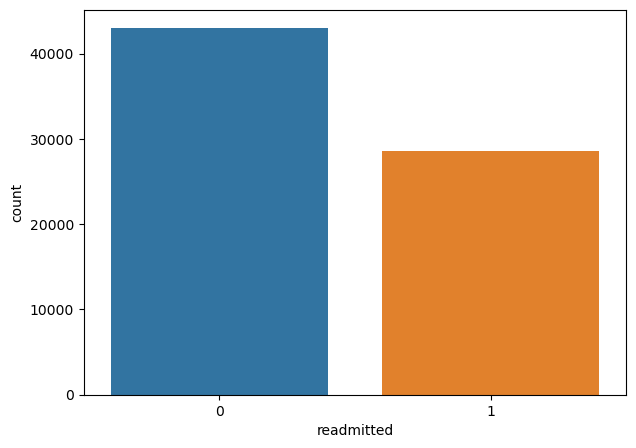

In [111]:
print(df2.readmitted.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='readmitted', data=df2)

In [121]:
# Ejemplo: Submuestreo de la clase mayoritaria
# Suponiendo que 'df' es tu dataframe original
# Separa las clases
clase_mayoritaria = df2[df2['readmitted'] == 0]
clase_minoritaria = df2[df2['readmitted'] == 1]

# Submuestreo de la clase mayoritaria
clase_mayoritaria_muestra_reducida = resample(clase_mayoritaria, 
                                              replace=False,    # Muestras sin reemplazo
                                              n_samples=len(clase_minoritaria),    # Igualar número de muestras
                                              random_state=42)  # Reproducibilidad

# Concatenar las clases submuestreadas
df_balanceado = pd.concat([clase_mayoritaria_muestra_reducida, clase_minoritaria])

# df_balanceado ahora contiene clases balanceadas
df_balanceado

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
22684,Caucasian,Female,[70-80),1,6,7,2,49,1,15,...,0,0,1,0,0,1,1,Ch,Yes,0
22734,AfricanAmerican,Female,[70-80),3,1,1,4,38,1,18,...,0,0,0,0,0,0,0,No,No,0
1977,Caucasian,Female,[60-70),2,1,4,2,31,2,21,...,0,1,0,0,0,0,1,Ch,Yes,0
35224,Caucasian,Male,[40-50),1,1,7,2,56,0,2,...,0,0,0,0,0,0,0,No,No,0
48169,Caucasian,Female,[70-80),2,1,1,4,71,2,13,...,0,0,0,0,0,0,1,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71503,NaN,Female,[70-80),2,1,1,4,41,0,13,...,0,0,0,0,0,0,1,Ch,Yes,1
71508,Caucasian,Female,[40-50),1,4,7,14,69,0,16,...,2,0,0,1,0,0,3,Ch,Yes,1
71513,Caucasian,Female,[70-80),1,1,7,9,50,2,33,...,0,0,0,2,0,0,1,Ch,Yes,1
71514,Other,Female,[40-50),1,1,7,14,73,6,26,...,0,0,1,0,0,0,2,Ch,Yes,1


readmitted
0    28533
1    28533
Name: count, dtype: int64


<Axes: xlabel='readmitted', ylabel='count'>

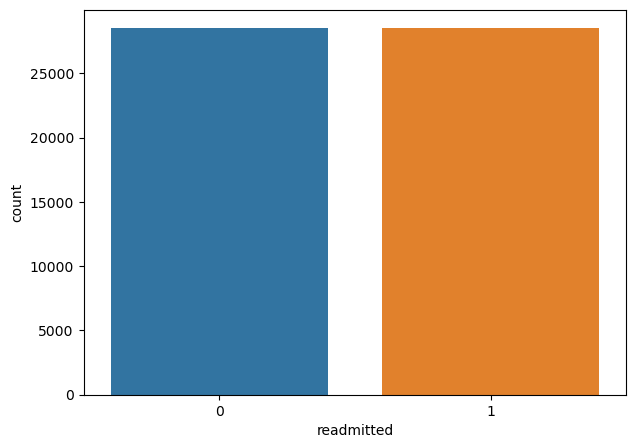

In [122]:
print(df_balanceado.readmitted.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='readmitted', data=df_balanceado)

In [123]:
# Definir las características (features) y la variable objetivo
X = df_balanceado.drop('readmitted', axis=1)  # Features
y = df_balanceado['readmitted']  # Target variable

# Definir las columnas numéricas y categóricas
numerical_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]
categorical_cols = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
    'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed'
]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Crear un pipeline para cada modelo
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_lr = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline_dt = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Lista de pipelines de modelos
pipelines = [
    ('RandomForest', pipeline_rf),
    ('XGBoost', pipeline_xgb),
    ('LogisticRegression', pipeline_lr),
    ('DecisionTree', pipeline_dt)
]

# Entrenar y evaluar cada modelo en el pipeline
results = {}
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'support': report['weighted avg']['support']
    }

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'
results_df.reset_index(inplace=True)

# Mostrar la tabla comparativa
print(results_df)

                Model  precision    recall  f1-score  support
0        RandomForest   0.605580  0.605572  0.605561  11414.0
1             XGBoost   0.610393  0.610391  0.610390  11414.0
2  LogisticRegression   0.607607  0.607587  0.607563  11414.0
3        DecisionTree   0.545315  0.545295  0.545221  11414.0


Sobremuestreo (Oversampling)

In [116]:
# Ejemplo: Sobremuestreo de la clase minoritaria
clase_minoritaria_sobremuestreada = resample(clase_minoritaria, 
                                             replace=True,     # Muestras con reemplazo
                                             n_samples=len(clase_mayoritaria),    # Igualar número de muestras
                                             random_state=42)  # Reproducibilidad

# Concatenar las clases sobremuestreadas
df_balanceado = pd.concat([clase_mayoritaria, clase_minoritaria_sobremuestreada])

# df_balanceado ahora contiene clases balanceadas
df_balanceado

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,0,0,0,0,0,0,0,No,No,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,0,0,1,0,0,0,0,No,Yes,0
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,0,0,0,0,0,0,2,Ch,Yes,0
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,0,0,1,0,0,0,1,Ch,Yes,0
6,Caucasian,Male,[60-70),3,1,2,4,70,1,21,...,1,1,0,0,0,0,1,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,Hispanic,Female,[70-80),6,1,17,2,60,2,14,...,1,0,0,0,1,0,0,Ch,Yes,1
11507,Caucasian,Male,[40-50),2,18,1,11,48,3,17,...,0,0,0,0,0,0,2,Ch,Yes,1
29359,Caucasian,Male,[50-60),2,3,1,7,1,2,21,...,1,1,1,0,0,0,2,Ch,Yes,1
9561,AfricanAmerican,Female,[70-80),1,18,3,2,28,0,5,...,0,0,0,0,0,0,0,No,No,1


readmitted
0    42985
1    42985
Name: count, dtype: int64


<Axes: xlabel='readmitted', ylabel='count'>

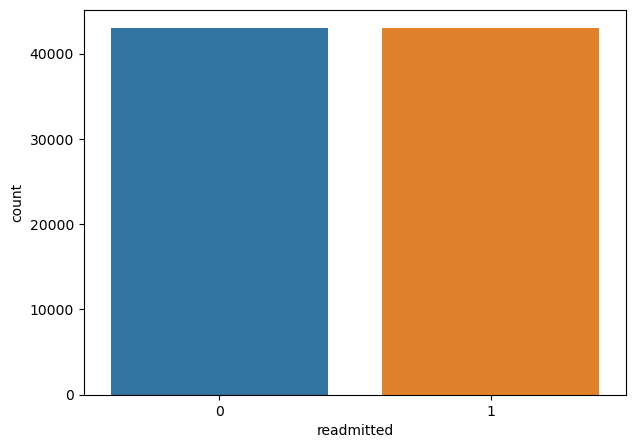

In [117]:
print(df_balanceado.readmitted.value_counts())
plt.figure(figsize=(7,5))
sns.countplot(x='readmitted', data=df_balanceado)

In [118]:
# Definir las características (features) y la variable objetivo
X = df_balanceado.drop('readmitted', axis=1)  # Features
y = df_balanceado['readmitted']  # Target variable

# Definir las columnas numéricas y categóricas
numerical_cols = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]
categorical_cols = [
    'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
    'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
    'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed'
]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
# Crear un pipeline para cada modelo
pipeline_rf = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline_xgb = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_lr = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

pipeline_dt = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Lista de pipelines de modelos
pipelines = [
    ('RandomForest', pipeline_rf),
    ('XGBoost', pipeline_xgb),
    ('LogisticRegression', pipeline_lr),
    ('DecisionTree', pipeline_dt)
]

# Entrenar y evaluar cada modelo en el pipeline
results = {}
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score'],
        'support': report['weighted avg']['support']
    }

# Crear DataFrame con los resultados
results_df = pd.DataFrame(results).T
results_df.index.name = 'Model'
results_df.reset_index(inplace=True)

# Mostrar la tabla comparativa
print(results_df)

ValueError: Found unknown categories [20] in column 4 during transform